In [1]:
import requests
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DATA_PREFIX = "data: "


def parse_chunk(chunk):
    lines = chunk.strip().split("\n")
    assert len(lines) == 2
    assert lines[0] == "event: braid"
    assert lines[1].startswith(DATA_PREFIX)
    buf = lines[1][len(DATA_PREFIX) :]
    data = json.loads(buf)
    return data

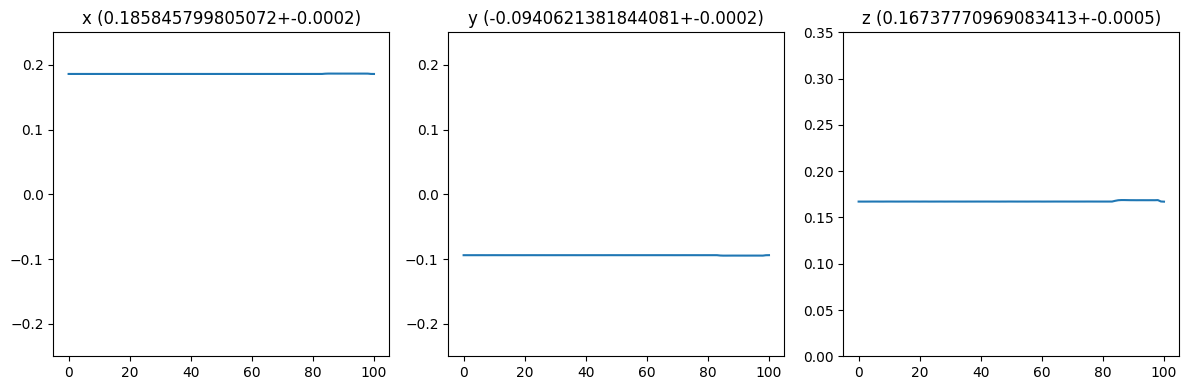

0.185845799805072 -0.0940621381844081 0.16737770969083413


In [ ]:
braid_url = "http://127.0.0.1:8397/"
events_url = f"{braid_url}/events"
session = requests.Session()
r = session.get(braid_url)
assert r.status_code == requests.codes.ok

r = session.get(events_url, stream=True, headers={"Accept": "text/event-stream"})

i = 0
zs = []
xs = []
ys = []
for chunk in r.iter_content(chunk_size=None, decode_unicode=True):
    if i > 100:
        break

    data = parse_chunk(chunk)
    try:
        zs.append(data["msg"]["Update"]["z"])
        xs.append(data["msg"]["Update"]["x"])
        ys.append(data["msg"]["Update"]["y"])
        i += 1
    except:
        pass

fig, axs = plt.subplots(ncols=3, figsize=(12, 4))
axs[0].plot(xs)
axs[0].set_ylim((-0.25, 0.25))
axs[1].plot(ys)
axs[1].set_ylim((-0.25, 0.25))
axs[2].plot(zs)
axs[2].set_ylim((0, 0.35))
axs[0].set_title(f"x ({np.nanmean(xs)}+-{np.nanstd(xs):.4f})")
axs[1].set_title(f"y ({np.nanmean(ys)}+-{np.nanstd(ys):.4f})")
axs[2].set_title(f"z ({np.nanmean(zs)}+-{np.nanstd(zs):.4f})")
plt.tight_layout()
plt.show()

print(np.nanmean(xs), np.nanmean(ys), np.nanmean(zs))

0.18808293288232683 -0.0892489840844495 0.16712523137440216
